<a href="https://colab.research.google.com/github/akhilabojja/projects/blob/main/Task_2brainwave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from wordcloud import WordCloud
import os
import re

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
pip install tweepy textblob matplotlib pandas requests


In [44]:
import getpass
# Replace these with your own Twitter API keys
api_key = '7Ig41rs8vtBBtWXp9CiVbvpgd'
api_secret_key = '5aHOq1Ji36OcJaiv4Tp2IHPf5KrhNBZpXK84TqUrPP3D8zTOO1'
access_token = '1864922395464671232-MCWpHK0Ie4iFvhdhbWmrbwAT0Gu6KO'
access_token_secret = 'Sz5KuWcRObVySBpei8Z1adxZVVpdp8yY8cQGiNahKnYRs'
# Step 1: Set up Twitter API credentials (Bearer Token for API v2)
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAAOQxQEAAAAAUp8xCwwHvtRHzD9WB1Su0IdUVVw%3Df5QppkxsLpJ8WhwMwTtORr5CyerzjoJ83IM3y0a7iVMoAWd0Qj'  # Replace with your Bearer Token from Twitter API v2

# Authenticate to Twitter
# Authenticate with Twitter API
auth = tweepy.OAuthHandler(api_key , api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)





In [45]:
# Step 2: Function to preprocess the tweet text
def preprocess_text(text):
    """
    Function to clean the tweet text by removing URLs, mentions, hashtags,
    non-alphanumeric characters, and converting text to lowercase.
    """
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@\S+', '', text)
    # Remove hashtags (#hashtag)
    text = re.sub(r'#\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text



In [59]:
# Create DataFrame
df = pd.DataFrame({'Tweet': tweet_data, 'Sentiment Score': sentiment_scores, 'Date': tweet_dates})
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display the first few rows of the DataFrame
print("Sample of fetched data:")
print(df.head())  # Display the first 5 rows

# Optional: Display all data
print("\nFull data:")
print(df.to_string(index=False))  # Display all rows in the DataFrame


Sample of fetched data:
                                               Tweet  Sentiment Score Date
0                              ai cng xanh xanh   nh              0.0  NaT
1            rt  shorts\n    ai\n\n\n\nyoutube \n\nt              0.0  NaT
2  rt  happening tomorrow\n\ncatch raymond maiore...              0.0  NaT
3  rt  mise au point\n\nje ne suis pas influenceu...              0.0  NaT
4                                               done              0.0  NaT

Full data:
                                                                                                                                                                                                                                                                      Tweet  Sentiment Score Date
                                                                                                                                                                                                                                

In [46]:
def fetch_and_analyze_sentiment_v2(query, count=100):
    """
    Fetch tweets using Twitter API v2 and analyze sentiment.
    """
    url = f'https://api.twitter.com/2/tweets/search/recent?query={query}&max_results={count}'
    headers = {
        'Authorization': f'Bearer {bearer_token}'
    }

    response = requests.get(url, headers=headers)

    # If rate limit is exceeded (HTTP Status 429), wait and retry
    if response.status_code == 429:
        print("Rate limit exceeded. Waiting for 15 minutes...")
        time.sleep(15 * 60)  # Wait for 15 minutes
        return fetch_and_analyze_sentiment_v2(query, count)  # Retry the request

    # Check if the request was successful
    if response.status_code == 200:
        response_data = response.json()
        tweets_data = response_data.get('data', [])
        tweet_data = []
        sentiment_scores = []
        tweet_dates = []

        for tweet in tweets_data:
            text = preprocess_text(tweet['text'])
            sentiment = TextBlob(text).sentiment.polarity  # Sentiment polarity: -1 to 1
            tweet_data.append(text)

            # Check if 'created_at' is available in the tweet
            tweet_date = tweet.get('created_at', 'Unknown')
            tweet_dates.append(tweet_date)
            sentiment_scores.append(sentiment)

        return tweet_data, sentiment_scores, tweet_dates
    else:
        print(f"Error: {response.status_code}")
        return [], [], []


In [27]:
pip install requests


In [47]:
import requests
import time
# Step 4: Fetch and analyze sentiment for a specific topic (e.g., 'AI')
query = 'AI'  # Change this to the topic you're interested in (e.g., "Machine Learning")
tweet_data, sentiment_scores, tweet_dates = fetch_and_analyze_sentiment_v2(query, count=100)


In [48]:
# Step 5: Store the data in a pandas DataFrame for easier analysis
df = pd.DataFrame({
    'Tweet': tweet_data,
    'Sentiment Score': sentiment_scores,
    'Date': tweet_dates
})

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [49]:

# Step 6: Group by date and calculate the average sentiment score for each day
daily_sentiment = df.groupby(df['Date'].dt.date)['Sentiment Score'].mean()

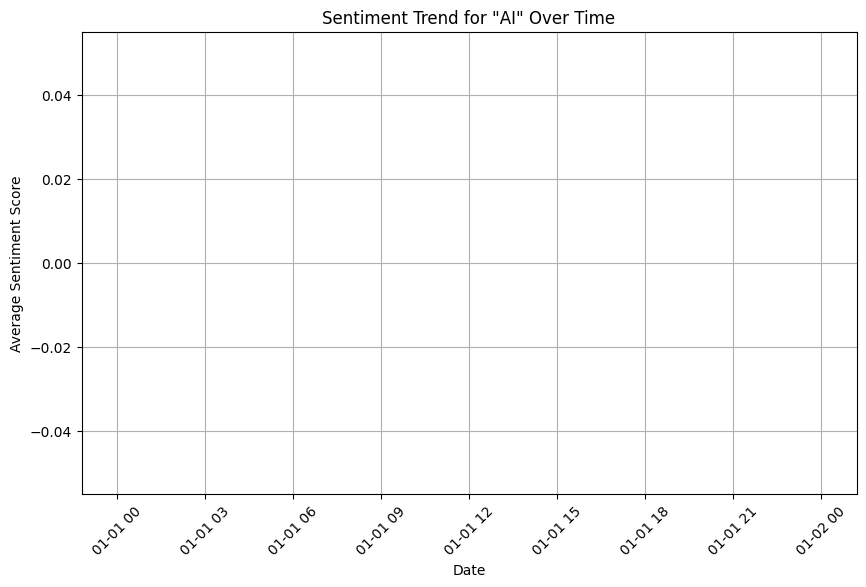

In [50]:
# Step 7: Visualize the sentiment trend over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-', color='b')
plt.title(f'Sentiment Trend for "{query}" Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


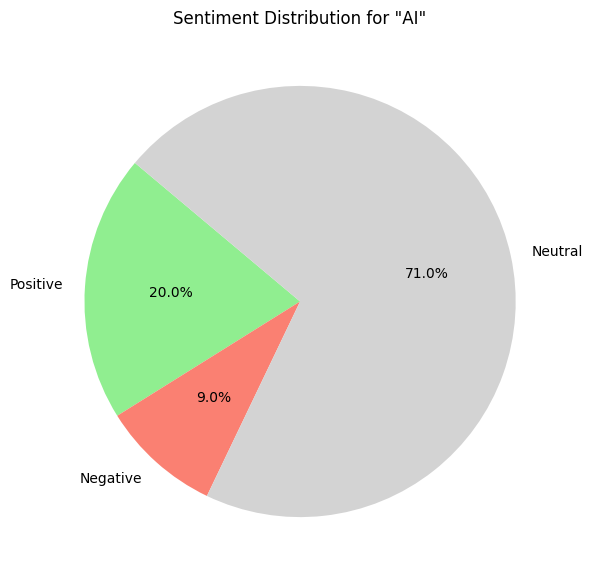

In [52]:
# Step 7: Visualize sentiment distribution using a pie chart
positive = len([score for score in sentiment_scores if score > 0])
negative = len([score for score in sentiment_scores if score < 0])
neutral = len([score for score in sentiment_scores if score == 0])

labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
colors = ['lightgreen', 'salmon', 'lightgray']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f'Sentiment Distribution for "{query}"')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


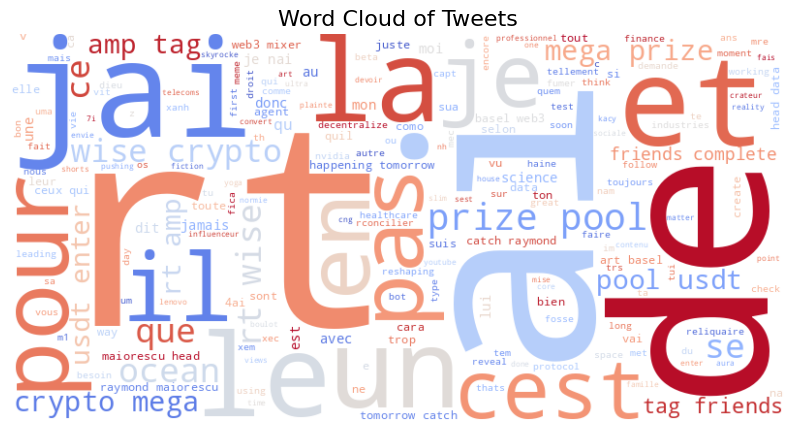

In [57]:
from wordcloud import WordCloud
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords
# Generate Word Cloud
all_text = " ".join(tweet_data)
stop_words = set(stopwords.words('english'))
cleaned_text = " ".join([word for word in all_text.split() if word not in stop_words])
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(cleaned_text)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets", fontsize=16)
plt.show()